# Test the performance on real images

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
from config import config
from utils.metrics import  PIVmetric
from piv_onepass import piv_scc, piv_scc_min, piv_scc_lpf, piv_spof, piv_rpc, piv_sbcc

cfg = config()
np.random.seed(202404)

In [2]:
def plot_field(x,y,u,v,vmax=None,cmap=None, scale=None):
    assert len(x.shape) == 2, "the 2D data is required"

    bkg = np.sqrt(u**2+v**2)
    plt.imshow(bkg, cmap=cmap, vmax=vmax, vmin=0.0)
    plt.colorbar()

    dx = x[1,0]-x[0,0]+0.0
    plt.quiver((y-y[0,0])/dx, (x-x[0,0])/dx, v/dx, -u/dx, scale=scale)
    plt.axis('off')

def test(img1, img2, contexts=None, vmax=None, plotfunc=None):        
    plt.figure(figsize=(10,10))
    names = ["image1", "image2"]
    for k, img in enumerate([img1, img2]):
        plt.subplot(1,2,k+1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        plt.title(names[k])
    plt.savefig("./data/output/temp.pdf")
        
    plt.figure(figsize=(15,8))
    xt,yt,ut,vt = piv_scc(img1, img2, cfg)
    names =["SCC","SCC-MIN", "SCC-LPF", "SPOF", "RPC", "SBCC"]
    for k, m in enumerate([piv_scc, piv_scc_min, piv_scc_lpf, piv_spof, piv_rpc, piv_sbcc]):
        try:
            x1,y1,u1,v1 = m(img1, img2, contexts=contexts, cfg=cfg)
        except:
            x1,y1,u1,v1 = m(img1, img2, cfg=cfg)
        plt.subplot(2,3,k+1)
        fig = plot_field(x1,y1,u1,v1, vmax=vmax, scale=1.5*vmax)
        if plotfunc is not None:
            plotfunc()
        # plt.hist(u1,bins=60, range=(-3,3))
        plt.title(names[k])

(1012, 1008)


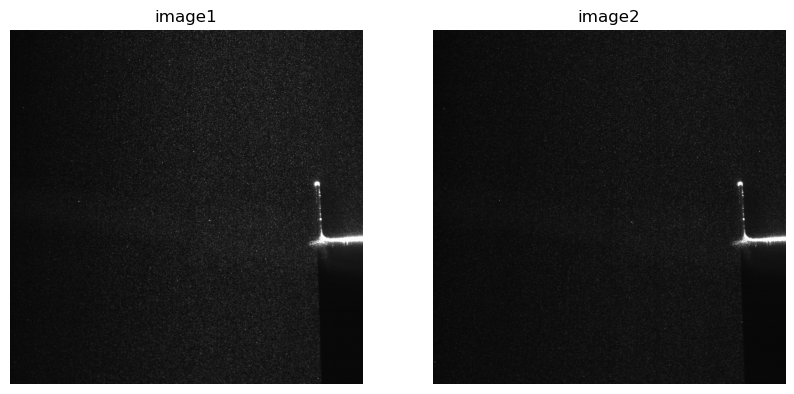

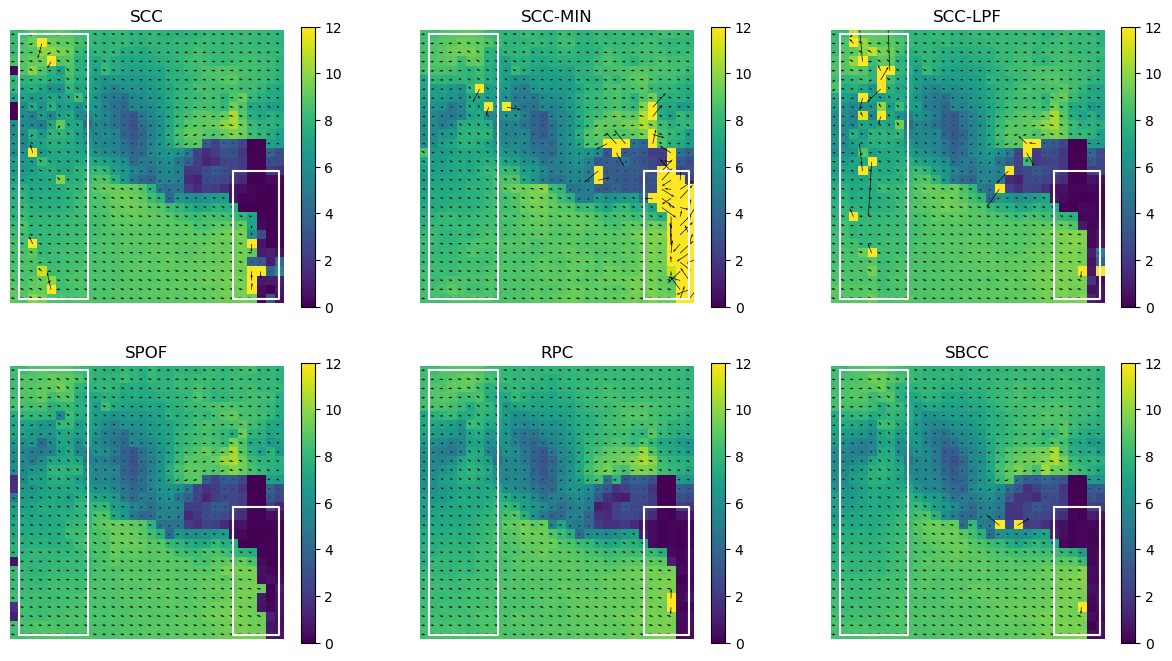

In [3]:
def boxfunc():
    x1, x2 = +0.5, 8
    y1, y2 = 0, 29
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1], color=(1.0,1.0,1.0))
    
    x1, x2 = 24, 29
    y1, y2 = 15, 29
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1], color=(1.0,1.0,1.0))


# img1 = cv2.imread("./data/real_images/openpiv2image_10.tif",0)[300:650,-320:]
# img2 = cv2.imread("./data/real_images/openpiv2image_11.tif",0)[300:650,-320:]
img1 = cv2.imread("./data/real_images/openpiv2image_10.tif",0)
img2 = cv2.imread("./data/real_images/openpiv2image_11.tif",0)
print(img1.shape)
bg = 1.0*np.random.randn(*img1.shape)+1.0

cfg.cc.step_sz =[[32,32]]
cfg.cc.win_sz =[[64,64]]
test(img1+bg, img2+bg, vmax=12, plotfunc=boxfunc)
plt.savefig("./data/output/openpiv.pdf")
plt.show()

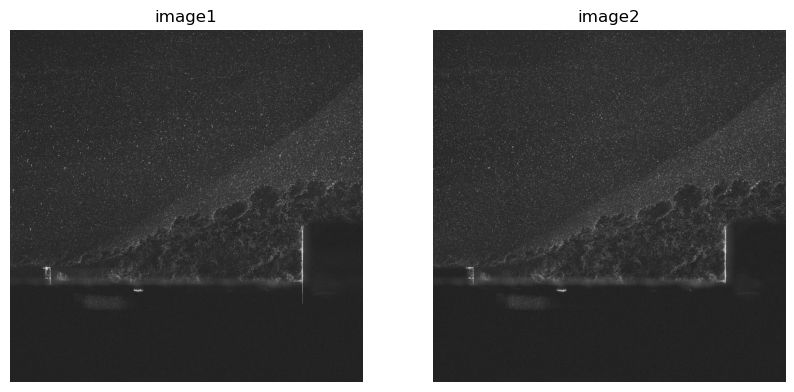

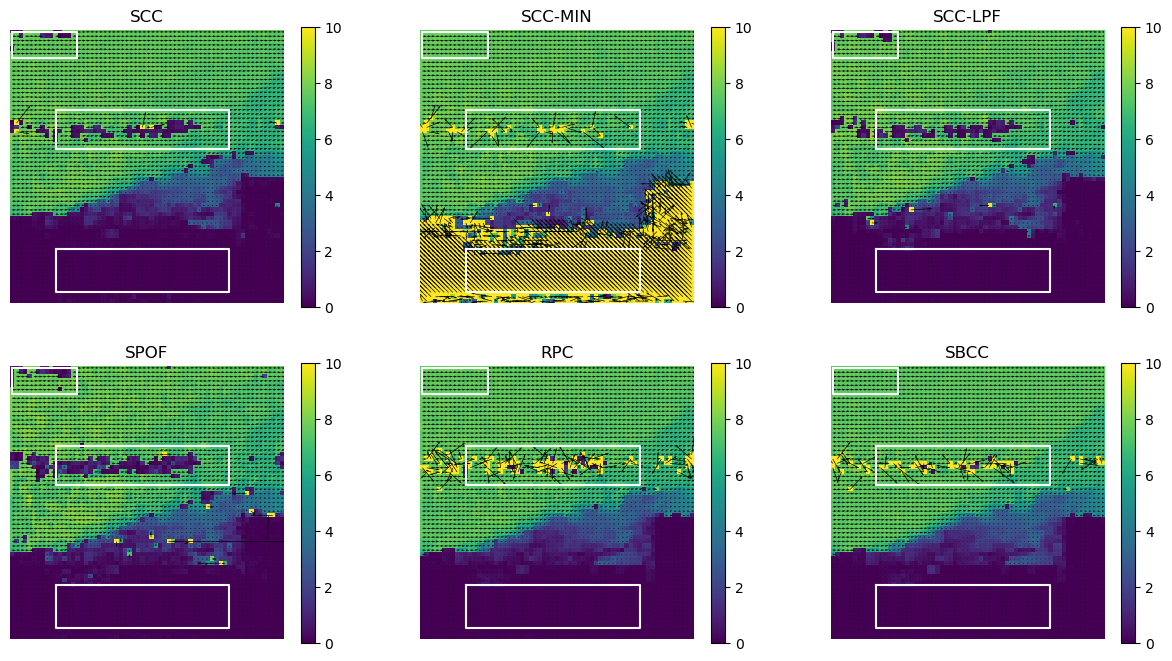

In [4]:
def boxfunc():
    x1, x2 = 10, 50
    y1, y2 = 18, 27
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1], color=(1.0,1.0,1.0))
    
    x1, x2 = 0, 15
    y1, y2 = 0, 6
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1], color=(1.0,1.0,1.0))

    x1, x2 = 10, 50
    y1, y2 = 50, 60
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1], color=(1.0,1.0,1.0))


img1 = cv2.imread("./data/real_images/400ns000000001.bmp",0)[:,:]
img2 = cv2.imread("./data/real_images/400ns000000002.bmp",0)[:,:]
bg = 10*np.random.randn(*img1.shape)
cfg.cc.step_sz =[[32,32]]
cfg.cc.win_sz =[[64,64]]
test(img1+bg, img2+bg, vmax=10, plotfunc=boxfunc)
plt.savefig("./data/output/supersonic.pdf")
plt.show()

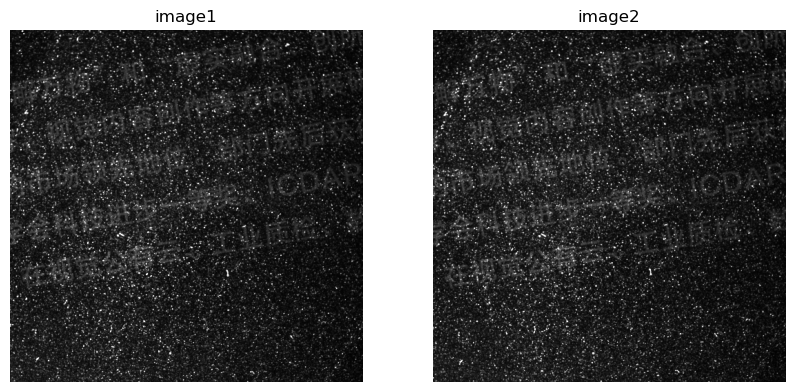

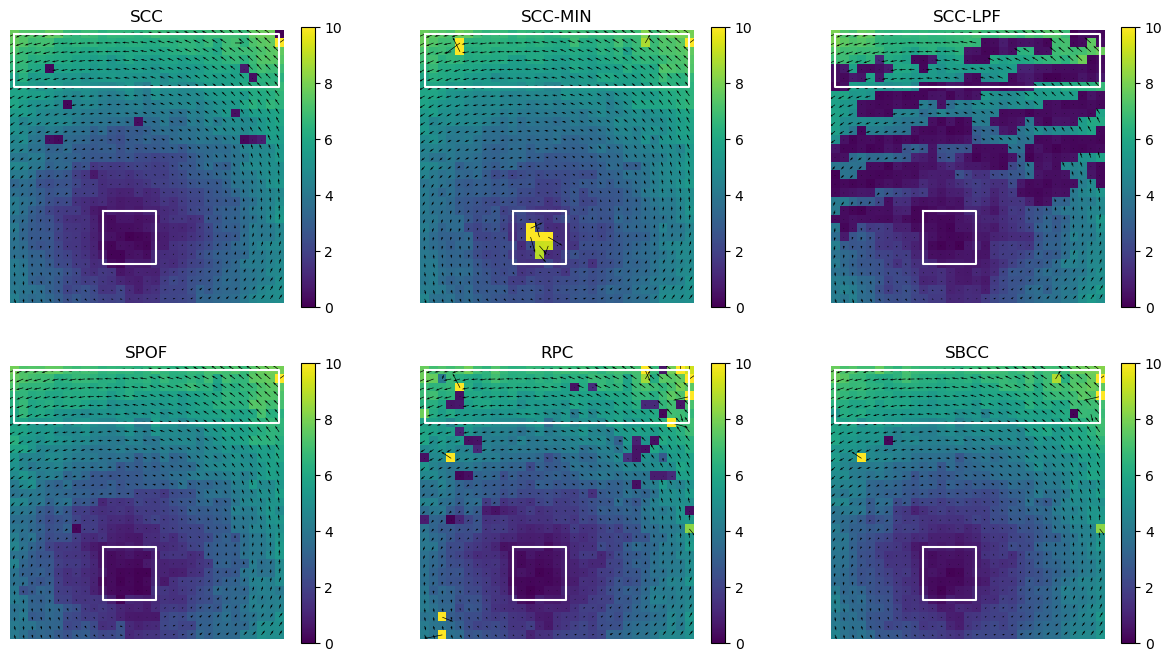

In [10]:
def boxfunc():
    x1, x2 = 10, 16
    y1, y2 = 20, 26
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1], color=(1.0,1.0,1.0))
    
    x1, x2 = 0, 30
    y1, y2 = 0, 6
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1], color=(1.0,1.0,1.0))
    
    # x1, x2 = 10, 50
    # y1, y2 = 50, 60
    # plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1], "b")
    


# 50Hz, 0.02s
img1 = cv2.imread("./data/real_images/Image_20240508115438104.bmp",0)[150:662,500:1012] 
# img2 = cv2.imread("./data/real_images/Image_20240508115438124.bmp",0)[200:712,500:1012]
# img2 = cv2.imread("./data/real_images/Image_20240508115438145.bmp",0)[200:712,500:1012]
# img2 = cv2.imread("./data/real_images/Image_20240508115438165.bmp",0)[150:662,500:1012]
img2 = cv2.imread("./data/real_images/Image_20240508115438184.bmp",0)[150:662,500:1012]

cfg.cc.step_sz =[[16,16]]
cfg.cc.win_sz =[[32,32]]
test(img1, img2, vmax=10, plotfunc=boxfunc)
plt.savefig("./data/output/labflow.pdf")
plt.show()

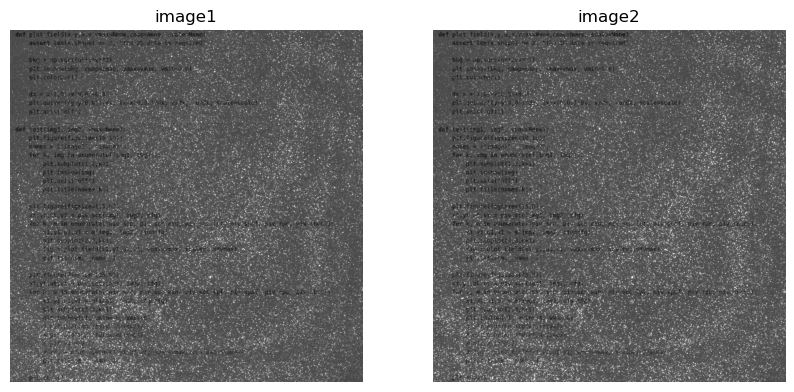

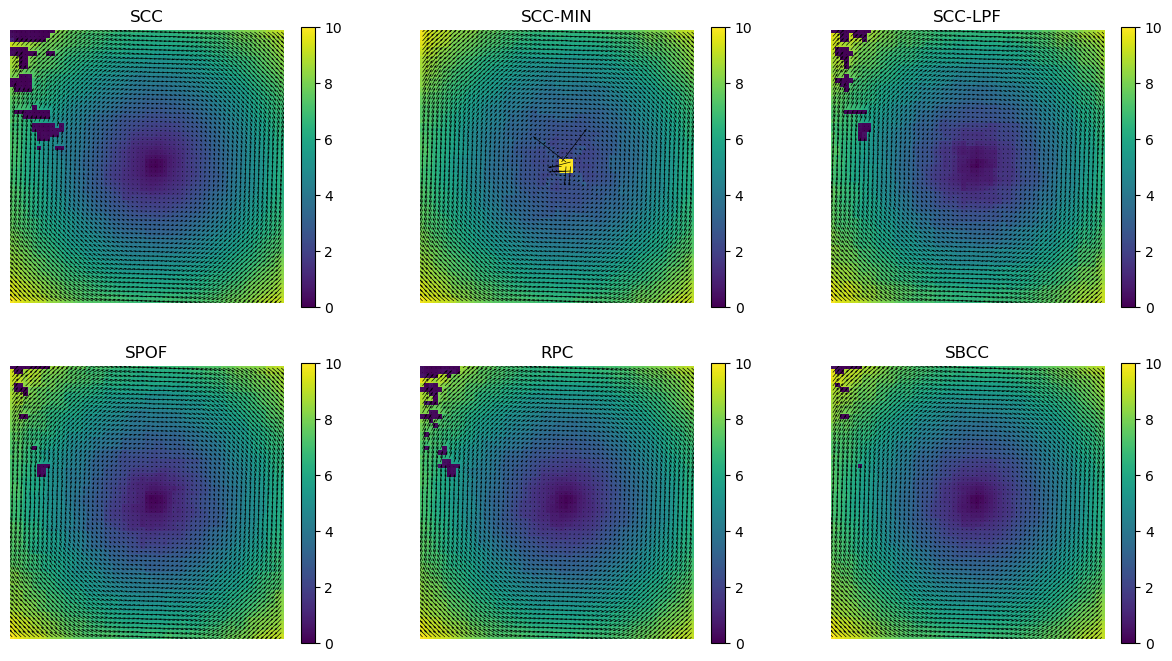

In [6]:
img1 = cv2.imread("./data/F_00001.bmp",0)
img2 = cv2.imread("./data/F_00002.bmp",0)
bg = cv2.imread("./data/high_bg.png",0)
bg = cv2.resize(bg, img1.shape)
cfg.cc.step_sz =[[16,16]]
cfg.cc.win_sz =[[64,64]]
test(img1+bg/2, img2+bg/2, vmax=10)

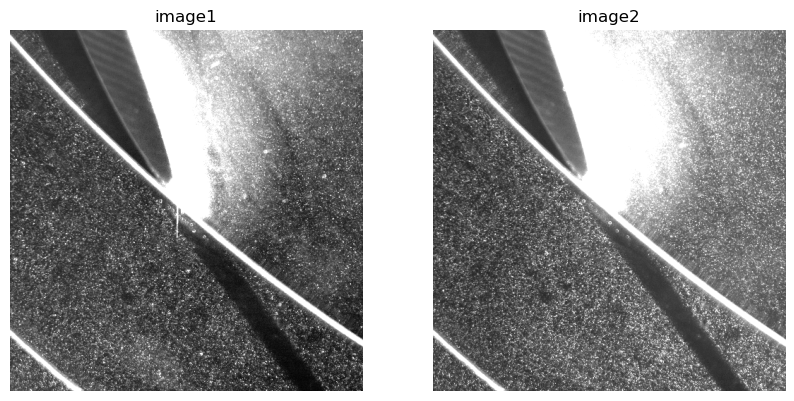

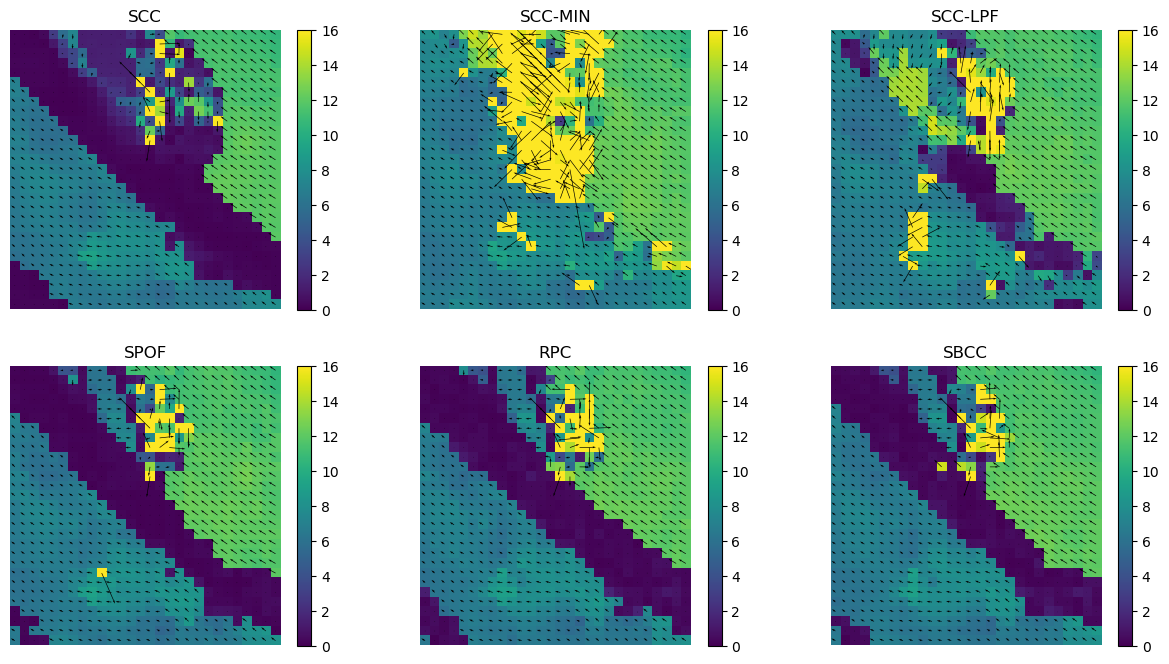

In [7]:
img1 = cv2.imread("./data/real_images/PC2001_C001_1.tif",0)[:,:500]
img2 = cv2.imread("./data/real_images/PC2001_C001_2.tif",0)[:,:500]
bck1 = cv2.imread("./data/real_images/PC2001_Cbg_1.tif",0)[:,:500]
bck2 = cv2.imread("./data/real_images/PC2001_Cbg_2.tif",0)[:,:500]
cfg.cc.step_sz =[[16,16]]
cfg.cc.win_sz =[[64,64]]
test(img1, img2, contexts= [bck1, bck2], vmax=16)

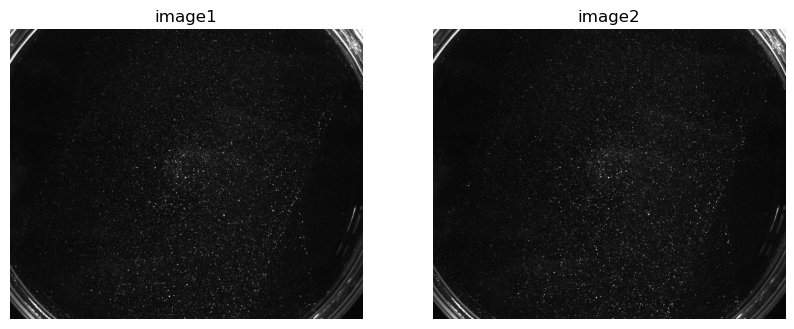

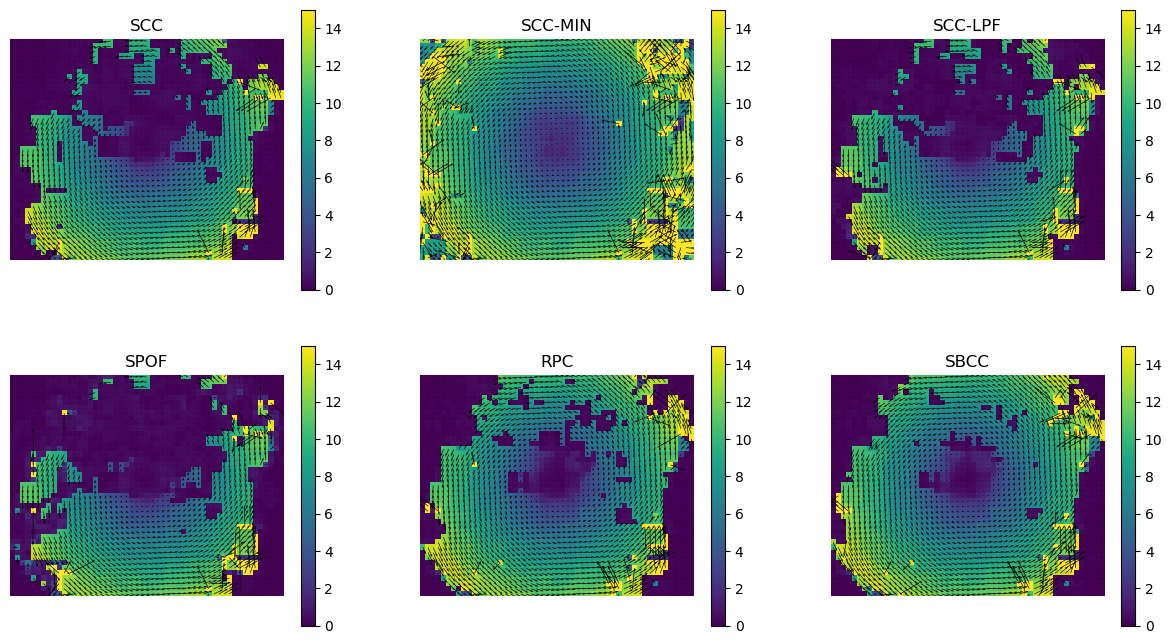

In [8]:
img1 = cv2.imread("./data/real_images/Image_20240307092505080.bmp",0)[140:-200,270:-270]
img2 = cv2.imread("./data/real_images/Image_20240307092505251.bmp",0)[140:-200,270:-270]
bg = 2*np.random.randn(*img1.shape)

cfg.cc.step_sz =[[16,16]]
cfg.cc.win_sz =[[64,64]]
test(img1+bg, img2+bg, vmax=15)